<a href="https://colab.research.google.com/github/prafullnayan/DATA-SCIENCE-PORTFOLIO/blob/master/AirplaneAccident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# **Table Of Contents**


*   Importing Libraries
*   Data Collection
*   Exploratory data Analysis(EDA)
*   Data Preprocessing
*   Standardising/Normalization
*   Model Training
      1.   KNN classifier
      2.   Support Vector Machine
      3.   RandomForest Classifier
      4.   Logistic Regression
*   HyperParameter Tuning
      1.   GridSearchCV
      2.   RandomizedSearchCV
* Model Prediction
* Model Evaluation
* Comaparison between different learning Algorithms












# **Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Data Collection**

In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/AirplaneAccident.csv')

In [ ]:
df

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Significant_Damage_And_Serious_Injuries,56.118721,8,1,63.445761,0.482359,78.64,5,38537.36341,2,0.026150,11493
9996,Highly_Fatal_And_Damaging,40.365297,10,7,62.169553,0.421775,79.77,4,40846.91690,2,0.074898,305
9997,Significant_Damage_And_Serious_Injuries,27.853881,17,1,69.598906,0.318277,80.37,3,33771.99630,3,0.168173,612
9998,Minor_Damage_And_Injuries,56.210046,8,0,39.835916,0.598118,76.92,5,39820.41925,2,0.026381,4963


# Exploratory Data Analysis

In [ ]:
# check the null values
# we don't have any null values
df.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [ ]:
df.dtypes

Severity                    object
Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
Accident_ID                  int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Safety_Score,10000.0,41.876406,16.138072,0.000000,30.593607,41.278539,52.511416,100.000000
Days_Since_Inspection,10000.0,12.931100,3.539803,1.000000,11.000000,13.000000,15.000000,23.000000
Total_Safety_Complaints,10000.0,6.564300,6.971982,0.000000,2.000000,4.000000,9.000000,54.000000
Control_Metric,10000.0,65.145324,11.882934,0.000000,56.927985,65.587967,73.336372,100.000000
Turbulence_In_gforces,10000.0,0.381495,0.121301,0.134000,0.293665,0.365879,0.451346,0.882648
Cabin_Temperature,10000.0,79.969331,2.759739,74.740000,77.960000,79.540000,81.560000,97.510000
Accident_Type_Code,10000.0,3.814900,1.902577,1.000000,2.000000,4.000000,5.000000,7.000000
Max_Elevation,10000.0,32001.803282,9431.995196,831.695553,25757.636910,32060.336420,38380.641515,64297.651220
Violations,10000.0,2.012200,1.039980,0.000000,1.000000,2.000000,3.000000,5.000000
Adverse_Weather_Metric,10000.0,0.255635,0.381128,0.000316,0.012063,0.074467,0.354059,2.365378


In [ ]:
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

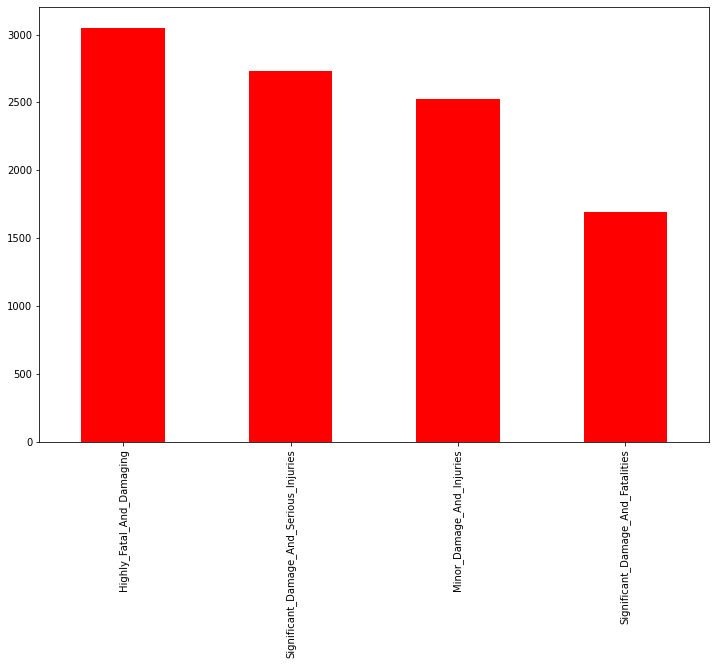

In [ ]:
plt.figure(figsize=(12,8))
df['Severity'].value_counts().plot(kind='bar',color='red')

[Text(0, 0, 'Highly_Fatal_And_Damaging'),
 Text(0, 0, 'Minor_Damage_And_Injuries'),
 Text(0, 0, 'Significant_Damage_And_Fatalities'),
 Text(0, 0, 'Significant_Damage_And_Serious_Injuries')]

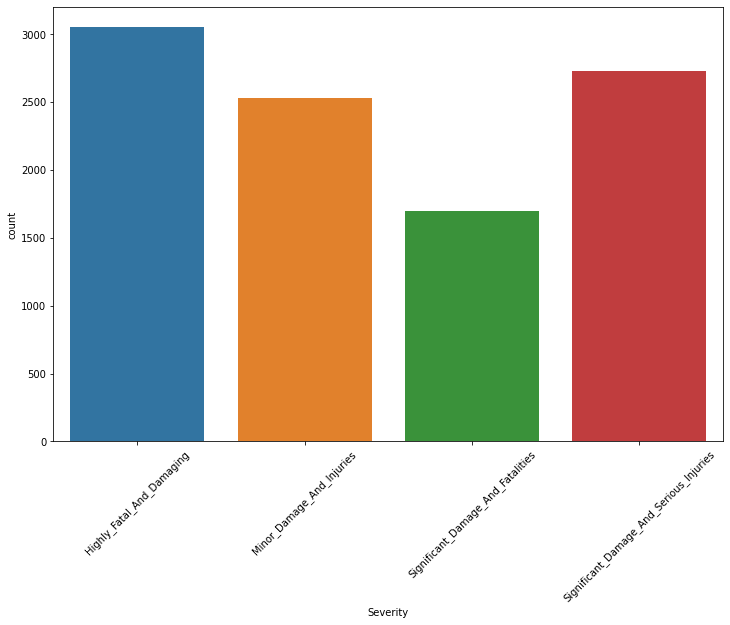

In [ ]:
plt.figure(figsize=(12,8))
order=sorted(df['Severity'].unique())
chart=sns.countplot(x='Severity',data=df,order=order)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [ ]:
# So Highly_Fatal_And_Damaging are in highest percentage amomgst all the damage
(df['Severity'].value_counts())/len(df['Severity'])*100

Highly_Fatal_And_Damaging                  30.49
Significant_Damage_And_Serious_Injuries    27.29
Minor_Damage_And_Injuries                  25.27
Significant_Damage_And_Fatalities          16.95
Name: Severity, dtype: float64

# Let us map the values of Severity to numerical

In [ ]:
df['class']=df['Severity'].map({'Highly_Fatal_And_Damaging':0,'Significant_Damage_And_Serious_Injuries':1,'Minor_Damage_And_Injuries':2,'Significant_Damage_And_Fatalities':3})

In [ ]:
df.head()['class']

0    2
1    2
2    3
3    1
4    3
Name: class, dtype: int64

In [ ]:
#Finding the correlation to target variable
df.corr()['class'].sort_values(ascending=False)

class                      1.000000
Safety_Score               0.338542
Turbulence_In_gforces      0.123512
Accident_Type_Code         0.098224
Violations                 0.056142
Days_Since_Inspection      0.041764
Total_Safety_Complaints    0.014633
Cabin_Temperature         -0.002892
Adverse_Weather_Metric    -0.007029
Accident_ID               -0.008971
Max_Elevation             -0.016023
Control_Metric            -0.184215
Name: class, dtype: float64

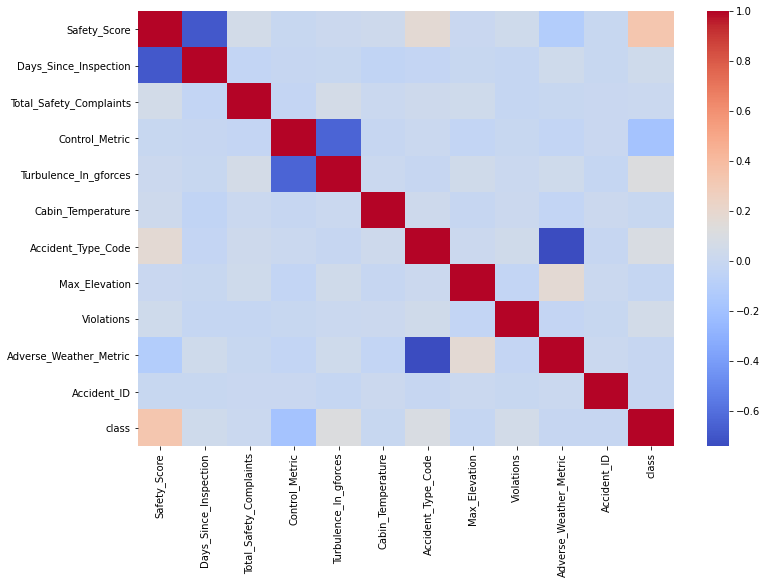

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm')

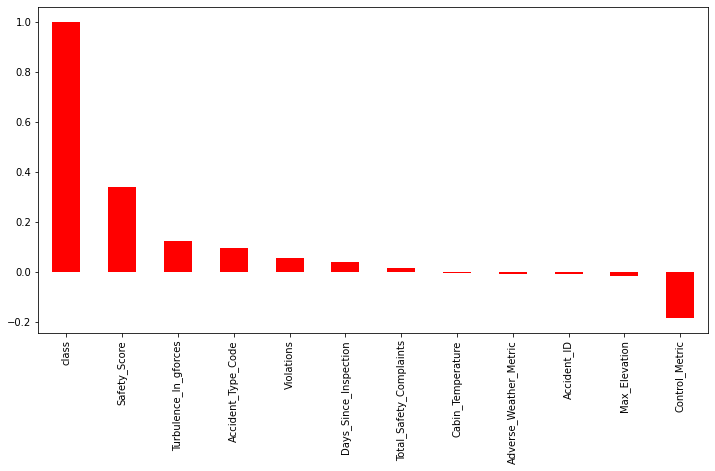

In [ ]:
plt.figure(figsize=(12,6))
df.corr()['class'].sort_values(ascending=False).plot(kind='bar',color='red')
# safety_score is highly correlated with the Severity

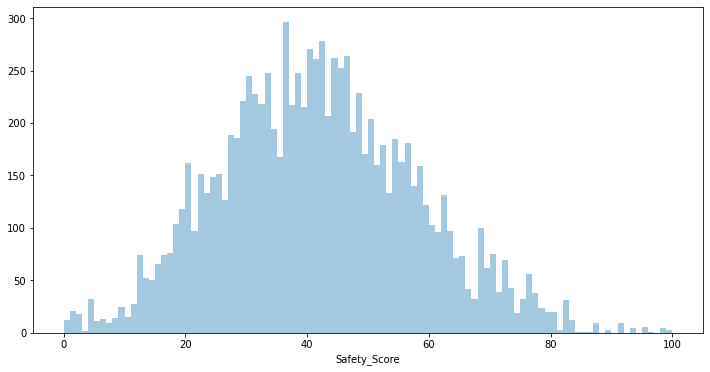

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df['Safety_Score'],kde=False,bins=100)

In [ ]:
# from here we can see that Highly_Fatal_And_Damaging severity having lower Safety_Score as expected.
df.groupby('Severity').mean()['Safety_Score'].sort_values(ascending=False)

Severity
Minor_Damage_And_Injuries                  47.800305
Significant_Damage_And_Fatalities          47.102113
Significant_Damage_And_Serious_Injuries    42.667443
Highly_Fatal_And_Damaging                  33.353611
Name: Safety_Score, dtype: float64

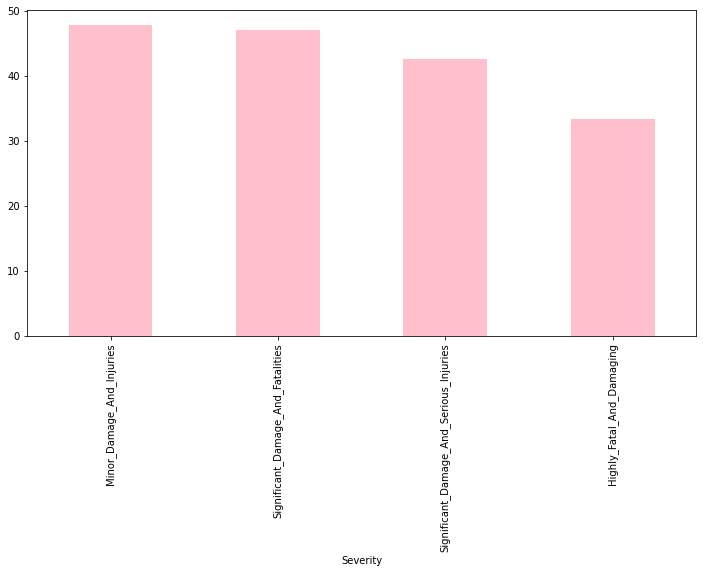

In [ ]:
plt.figure(figsize=(12,6))
df.groupby('Severity').mean()['Safety_Score'].sort_values(ascending=False).plot(kind='bar',color='pink')

In [ ]:
df[df['Turbulence_In_gforces']==df['Turbulence_In_gforces'].max()]['Severity'].value_counts()

Minor_Damage_And_Injuries    3
Name: Severity, dtype: int64

In [ ]:
df[df['Turbulence_In_gforces']==df['Turbulence_In_gforces'].min()]['Severity'].value_counts()

Highly_Fatal_And_Damaging                  5
Significant_Damage_And_Serious_Injuries    2
Minor_Damage_And_Injuries                  1
Name: Severity, dtype: int64

[Text(0, 0, 'Minor_Damage_And_Injuries'),
 Text(0, 0, 'Significant_Damage_And_Fatalities'),
 Text(0, 0, 'Significant_Damage_And_Serious_Injuries'),
 Text(0, 0, 'Highly_Fatal_And_Damaging')]

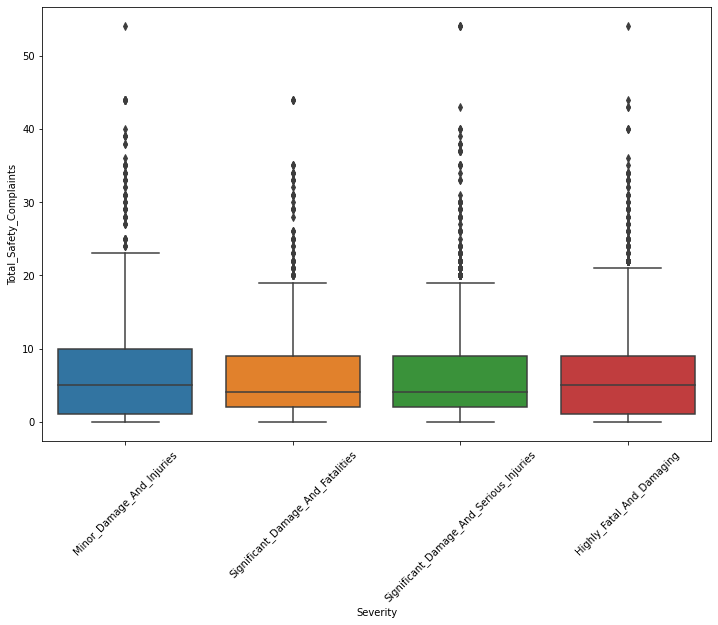

In [ ]:
plt.figure(figsize=(12,8))
chart=sns.boxplot(x='Severity',y='Total_Safety_Complaints',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
# Highly_Fatal_And_Damaging have highest no of complaints

In [ ]:
df['Accident_Type_Code'].value_counts().sort_values(ascending=False)

4    2057
2    1791
3    1752
7    1276
6    1215
1    1171
5     738
Name: Accident_Type_Code, dtype: int64

[Text(0, 0, 'Minor_Damage_And_Injuries'),
 Text(0, 0, 'Significant_Damage_And_Fatalities'),
 Text(0, 0, 'Significant_Damage_And_Serious_Injuries'),
 Text(0, 0, 'Highly_Fatal_And_Damaging')]

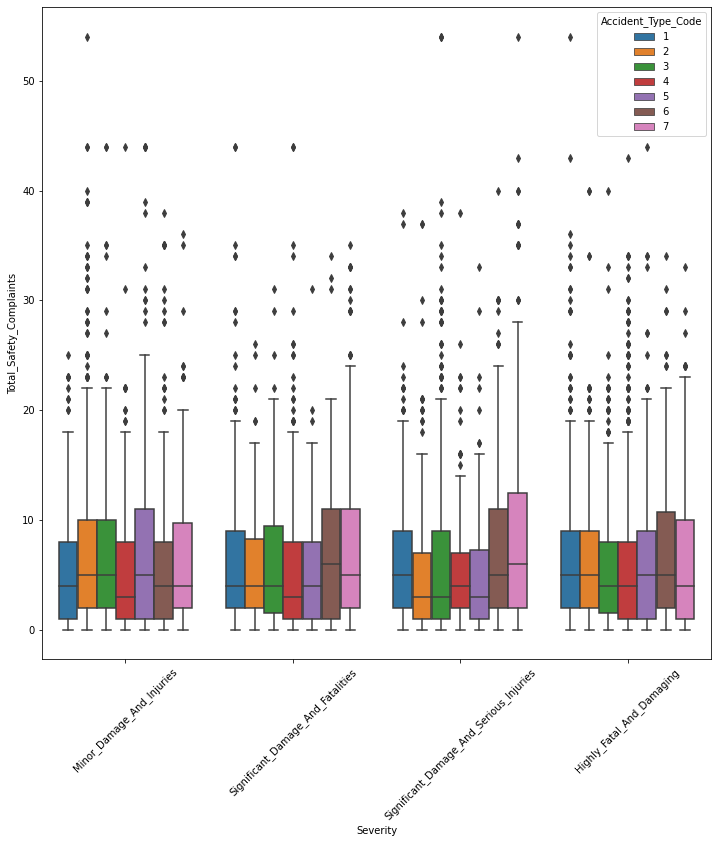

In [ ]:
plt.figure(figsize=(12,12))
chart=sns.boxplot(x='Severity',y='Total_Safety_Complaints',data=df,hue='Accident_Type_Code')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [ ]:
df['Violations'].value_counts().sort_values(ascending=False)
# so maximum violations are done of type 2

2    3793
1    2398
3    2376
0     696
4     675
5      62
Name: Violations, dtype: int64

[Text(0, 0, 'Minor_Damage_And_Injuries'),
 Text(0, 0, 'Significant_Damage_And_Fatalities'),
 Text(0, 0, 'Significant_Damage_And_Serious_Injuries'),
 Text(0, 0, 'Highly_Fatal_And_Damaging')]

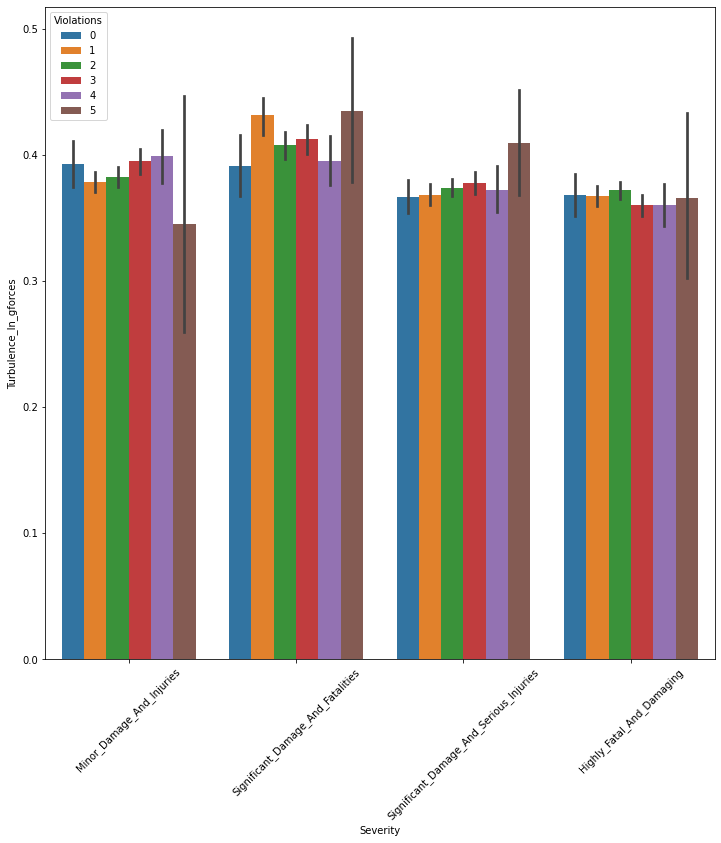

In [ ]:
# to see which type of violation results in which type of severity
plt.figure(figsize=(12,12))
chart=sns.barplot(x='Severity',y='Turbulence_In_gforces',data=df,hue='Violations')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


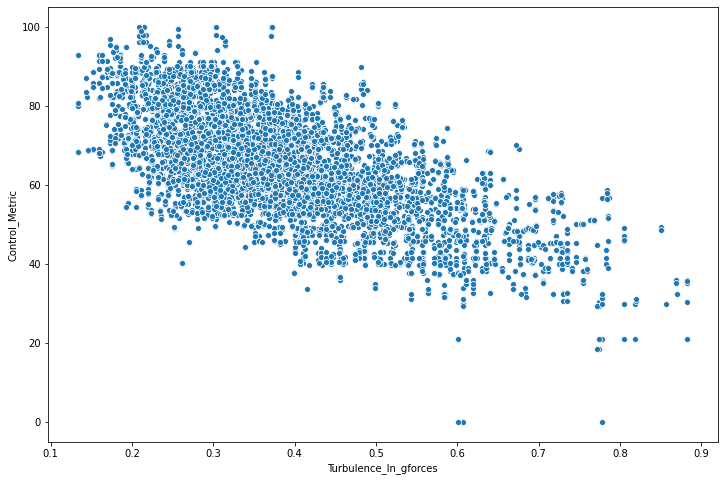

In [ ]:
# here we can see that as the turbulance increases the control of the airplane decreases.
plt.figure(figsize=(12,8))
sns.scatterplot(x='Turbulence_In_gforces',y='Control_Metric',data=df)


[Text(0, 0, 'Minor_Damage_And_Injuries'),
 Text(0, 0, 'Significant_Damage_And_Fatalities'),
 Text(0, 0, 'Significant_Damage_And_Serious_Injuries'),
 Text(0, 0, 'Highly_Fatal_And_Damaging')]

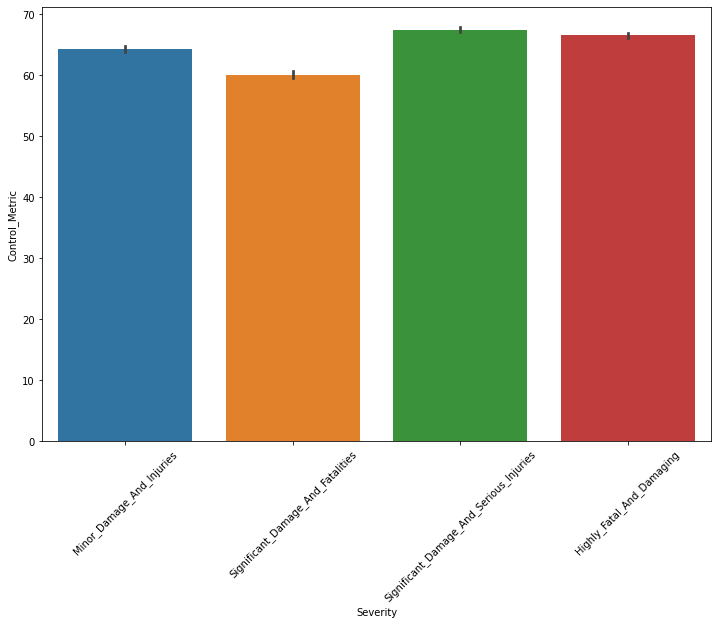

In [ ]:
# Highly_Fatal_And_Damaging have less control metric as compared with others 
plt.figure(figsize=(12,8))
chart=sns.barplot(x='Severity',y='Control_Metric',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0, 'Minor_Damage_And_Injuries'),
 Text(0, 0, 'Significant_Damage_And_Fatalities'),
 Text(0, 0, 'Significant_Damage_And_Serious_Injuries'),
 Text(0, 0, 'Highly_Fatal_And_Damaging')]

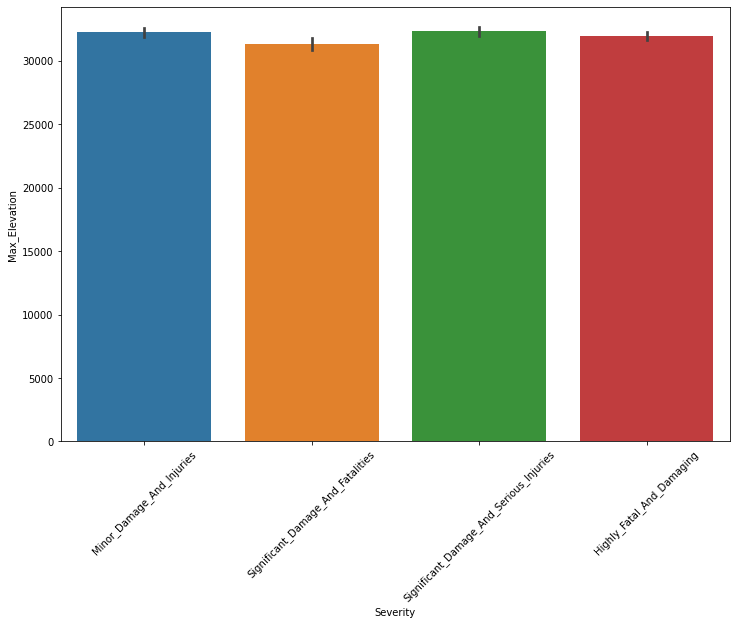

In [ ]:
#Highly_Fatal_And_Damaging has maximum elevation
plt.figure(figsize=(12,8))
chart=sns.barplot(x='Severity',y='Max_Elevation',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0, 'Minor_Damage_And_Injuries'),
 Text(0, 0, 'Significant_Damage_And_Fatalities'),
 Text(0, 0, 'Significant_Damage_And_Serious_Injuries'),
 Text(0, 0, 'Highly_Fatal_And_Damaging')]

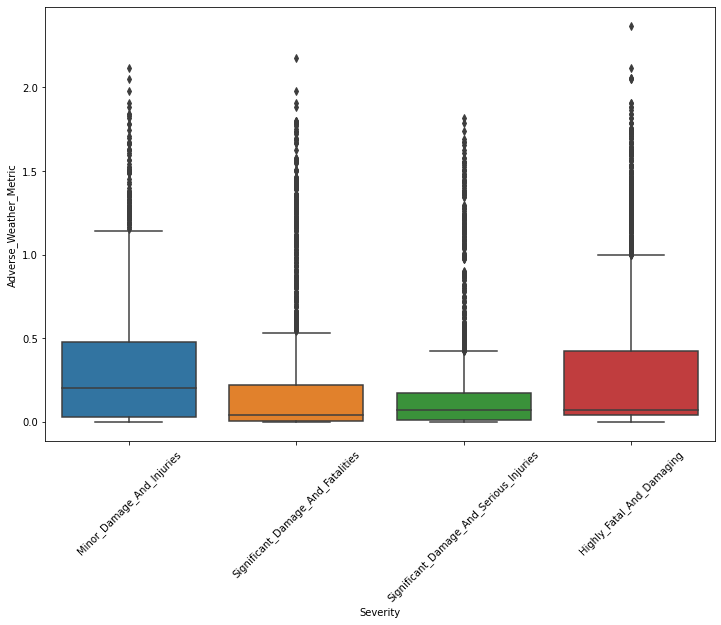

In [ ]:
# here we can see that in adverse weather metric there is highly fatal and damaging
plt.figure(figsize=(12,8))
chart=sns.boxplot(x='Severity',y='Adverse_Weather_Metric',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


In [ ]:
df.groupby('Severity').mean()['Cabin_Temperature']

Severity
Highly_Fatal_And_Damaging                  80.023526
Minor_Damage_And_Injuries                  79.903961
Significant_Damage_And_Fatalities          80.041516
Significant_Damage_And_Serious_Injuries    79.924478
Name: Cabin_Temperature, dtype: float64

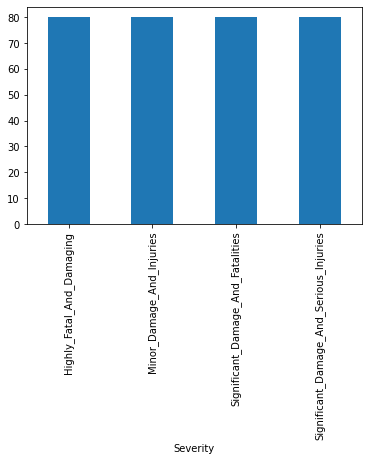

In [ ]:
#Cabin_Temperature doe snot have any effect on severity as all have about same temperature 
df.groupby('Severity').mean()['Cabin_Temperature'].plot(kind='bar')

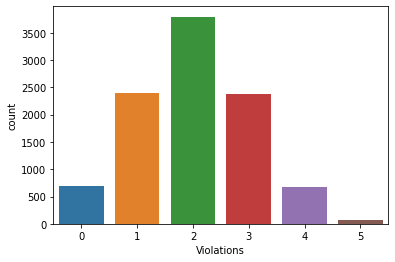

In [ ]:
# 2nd type of violations are mostly done 
sns.countplot(df['Violations'])

# Data Preprocessing

**As we have made a new(integer) column for Severity so we will drop severity**

In [ ]:
df.drop('Severity',axis=1,inplace=True)

In [ ]:
df.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,class
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570,2
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128,2
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181,3
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946,1
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054,3


In [ ]:
X=df.drop('class',axis=1)
y=df['class']

In [ ]:
X.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054


In [ ]:
y.head()

0    2
1    2
2    3
3    1
4    3
Name: class, dtype: int64

# splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Normalizating the data**

In [ ]:

X=StandardScaler().fit(X).transform(X.astype(float))

In [ ]:
X

array([[ 0.45530256,  0.30198105,  2.2140724 , ...,  0.94987305,
         0.44270091,  0.36106634],
       [ 1.2758883 , -0.82808182,  2.93126449, ..., -0.01173158,
         0.25377304,  1.6236738 ],
       [ 1.31267317,  0.01946533,  1.35344189, ...,  0.94987305,
        -0.66193896, -1.13173567],
       ...,
       [-0.86895304,  1.1495282 , -0.79813439, ...,  0.94987305,
        -0.22949275, -1.56636294],
       [ 0.88823228, -1.39311325, -0.94157281, ..., -0.01173158,
        -0.60154411, -0.36109637],
       [ 0.50340586,  0.01946533, -0.51125756, ..., -0.01173158,
        -0.62606475,  0.86439187]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('size of train set',X_train.shape,y_train.shape)
print('size of test set',X_test.shape,y_test.shape)

size of train set (8000, 11) (8000,)
size of test set (2000, 11) (2000,)


# **I have build models by four algorithms and then compare which algoritms has best accuracy.Algoriths are:-** 

1.   K Nearest Neighbour(KNN)
2.  Support Vector Machine(SVM)
3.  Random Forest Classifier
2.  Logistic Regression





# **Model Training**

## 1.KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

k=4
model=KNeighborsClassifier(n_neighbors=k)

In [ ]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
pred=model.predict(X_test)

In [ ]:
pred

array([0, 0, 2, ..., 1, 0, 1])

In [ ]:

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,log_loss

In [ ]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       709
           1       0.64      0.62      0.63       593
           2       0.59      0.62      0.61       466
           3       0.54      0.73      0.62       232

    accuracy                           0.65      2000
   macro avg       0.63      0.66      0.64      2000
weighted avg       0.66      0.65      0.65      2000



# **Chossing the best value of K for KNN**

In [ ]:

k_val=20
mean_acc=np.zeros((k_val-1))
for n in range(1,k_val):
    model1=KNeighborsClassifier(n_neighbors=n)
    model1.fit(X_train,y_train)
    pred=model1.predict(X_test)
    mean_acc[n-1]=accuracy_score(pred,y_test)


mean_acc

array([0.6315, 0.607 , 0.641 , 0.6515, 0.6565, 0.671 , 0.662 , 0.665 ,
       0.6675, 0.6595, 0.6635, 0.676 , 0.663 , 0.6645, 0.666 , 0.6705,
       0.668 , 0.6675, 0.662 ])

In [ ]:
p=np.arange(1,k_val)

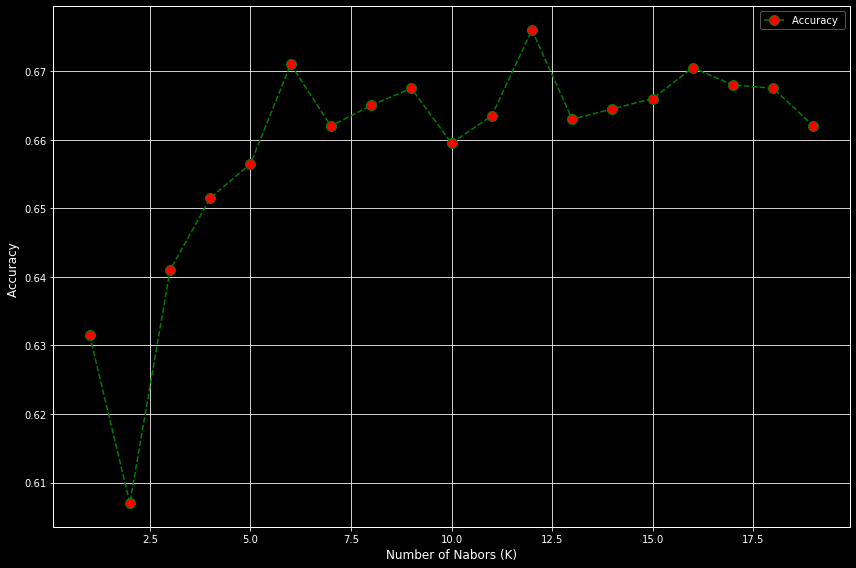

In [ ]:
plt.style.use('ggplot')
with plt.style.context('dark_background'):
    plt.figure(figsize=(12,8))
    plt.plot(p,mean_acc,marker='o', markerfacecolor='red', linestyle='dashed', color='green', markersize=10)
    plt.legend(('Accuracy ', '+/- 3xstd'))
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Nabors (K)')
    plt.tight_layout()
plt.show()

In [ ]:
print("best accuracy is",mean_acc.max(),'for k value=',mean_acc.argmax())

best accuracy is 0.676 for k value= 11


## 2.Support Vector Machines

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
yhat = clf.predict(X_test)

In [ ]:
# SVM has perform better than KNN
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       604
           1       0.88      0.91      0.89       556
           2       0.89      0.79      0.84       553
           3       0.84      0.92      0.88       287

    accuracy                           0.86      2000
   macro avg       0.86      0.87      0.87      2000
weighted avg       0.87      0.86      0.86      2000



In [ ]:
confusion_matrix(yhat,y_test)

array([[522,  34,  22,  26],
       [ 13, 505,  30,   8],
       [ 69,  30, 439,  15],
       [ 16,   6,   2, 263]])

# **Hyperparameter tuning with GridSearchCV**

In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = clf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [ ]:

accuracy = grid_search.best_score_

In [ ]:
accuracy

0.8952500000000001

In [ ]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

# 3.Random Forest Classifier

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9145


# **HyperParameter Tuning using RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
model=RandomForestClassifier(n_jobs=-1)

In [ ]:
parameters={'max_depth':[3,5,7,10,None],
           'n_estimators':[100,200,300,400,500],
           'max_features':randint(1,13),
           'criterion':['gini','entropy'],
           'bootstrap':[True,False],
           'min_samples_leaf':randint(1,5)}

In [ ]:
def hyperparameter_tuning(model,parameters,n_of_itern,X_train,y_train):
    random_search=RandomizedSearchCV(estimator=model,
                                    param_distributions=parameters,
                                    n_jobs=-1,
                                     n_iter=n_of_itern,
                                     cv=9)
    random_search.fit(X_train,y_train)
    params=random_search.best_params_
    score=random_search.best_score_
    return params,score

In [ ]:
final_params,final_score=hyperparameter_tuning(model,parameters,40,X_train,y_train)

**Tuned parameters are:**

In [ ]:
#this is our final best parameters for random forest classifier
final_params

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 7,
 'min_samples_leaf': 2,
 'n_estimators': 300}

In [ ]:
# final accuracy with tuned parameters
final_score

0.9505004160515972

# Building the model again

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators=300,
                             criterion='entropy',
                             max_depth=None,
                             max_features=7,
                             min_samples_leaf=2,
                             bootstrap=False
                             )
                            

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9540


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       615
           1       0.95      0.96      0.96       569
           2       0.96      0.95      0.95       500
           3       0.95      0.94      0.94       316

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [ ]:
print(confusion_matrix(y_pred,y_test))

[[590   9  11   5]
 [  9 548   6   6]
 [  4  17 474   5]
 [ 17   1   2 296]]


# 4.Logistic Regresssion

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
log_predict=log_reg.predict(X_test)

In [ ]:
print(classification_report(log_predict,y_test))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       695
           1       0.66      0.72      0.69       532
           2       0.66      0.58      0.62       559
           3       0.25      0.36      0.29       214

    accuracy                           0.64      2000
   macro avg       0.60      0.60      0.59      2000
weighted avg       0.67      0.64      0.65      2000



In [ ]:
print(confusion_matrix(log_predict,y_test))

[[505  61   1 128]
 [  6 381 110  35]
 [ 88  73 326  72]
 [ 21  60  56  77]]


# DataFrame for all the algorithms and their accuracy

In [ ]:
data_dict={'Algorithms':['KNN', 'SVM', 'RandomForest', 'logistic regression'],'accuracy':[0.676,0.86,0.91,0.61],'accuracy_after_hyperparameter tuning':['-',0.89,0.95,'-']}
accuracy_df=pd.DataFrame(data_dict)

In [ ]:
accuracy_df.set_index('Algorithms',inplace=True)

In [ ]:
accuracy_df

,accuracy,accuracy_after_hyperparameter tuning
Algorithms,,
KNN,0.676,-
SVM,0.860,0.89
RandomForest,0.910,0.95
logistic regression,0.610,-


# so we can see that RandomForest Classifier outperforms all other algorithms having accuracy of 95%.